<a href="https://colab.research.google.com/github/Sedinei/DSWP/blob/master/NB_trabalhado/FIFA_NB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importes e configurações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Ajusta as configurações do Pandas e do Seaborn
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 50,
    'display.precision': 2,
    'display.show_dimensions': True
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)

sns.set_theme(style='dark')

## Significado da variável 'Position'
* GK = Goalkeeper – Goleiro.
* RB = Right Back – Zagueiro Direito.
* CB = Central Back – Zagueiro Central.
* LB = Left Back – Zagueiro Esquerdo.
* SW = Sweeper – Líbero.
* RWB = Right Wing Back – Lateral Direito.
* LWB = Left Wing back – Lateral Esquerdo.
* CDM = Central Defensive Midfielder – Meio Campo Defensivo / Volante.
* CM = Central Midfielder – Meia Central.
* CAM = Center Attacking Middlefielder – Meio Campo Ofensivo / Armador.
* OM = Offensive Midfielder – Meia Ofensivo.
* LOM = Left Offensive Midfielder – Meia Esquerda Ofensivo.
* ROM = Right Offensive Midfielder – Meia Direita Ofensivo.
* LM = Left Midfielder – Meia Esquerda.
* RM = Right Midfielder – Meia Direita.
* LWM = Left Wing Midfielder – Meio Ala Esquerdo.
* RWM = Right Wing Midfielder – Meio Ala Direito.
* RW = Right Winger – Ala Direito.
* LW = Left Winger – Ala Esquerto.
* LF = Left Forward – Atacante Esquerdo.
* RF = Right Forward – Atacante Direito.
* ST = Striker – Atacante.
* CF = Center Forward – Centro Avante.
* RS = Right Striker – Atacante Direito.
* LS = Left Striker – Atacante Esquerdo.

___
## 1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);

In [7]:
url = 'https://raw.githubusercontent.com/Sedinei/DSWP/master/Dataframes/FIFA.csv'
df_fifa = pd.read_csv(url, index_col='ID')
df_fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


___
## 2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?

In [4]:
df_fifa.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'

A importância de se identificar o que pode ser iliminado é a de diminuir o espaço em memória e concentrar no que é importante. Também evita contaminações indevidas em razão de variáveis não úteis.
As colunas que não são importantes para a análise que vamos fazer são:
* Unnamed: 0 -> É apenas uma sequencia numérica de cada linha. Já temos o ID que identifica o jogador;
* Photo -> É apenas a imagem do jogador;
* Flag -> Bandeira da nacionalidade;
* Club Logo -> Imagem do logo do clube;
* Body Type -> Imagem do personagem no jogo;
* Real Face -> Indica se o personagem tem o rosto do jogador;

In [8]:
df_fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Body Type', 'Real Face'], inplace=True)
df_fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
     

___
## 3. Qual o dtype de cada variável/atributo do dataframe?

In [9]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  

___
## 4. Se alguma variável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

Em alguns casos podemos apenas alterar o tipo. Em outros mais, vamos ter que primeiro fazer uma transformação nos dados para depois trocar o tipo.

In [10]:
# Explorando a variável 'Loaned From'
df_fifa[df_fifa['Loaned From'].notna()]['Loaned From'].head(20)

ID
198710            Real Madrid
167664               Juventus
187961           FC Barcelona
212523             SL Benfica
207410            Real Madrid
216409               Sassuolo
203890        Atlético Madrid
202685            Valencia CF
226226    Paris Saint-Germain
219809                Chelsea
215785              AS Monaco
211575           FC Barcelona
204529                Chelsea
190544                 Torino
188943    Paris Saint-Germain
230938               Atalanta
228941                  Milan
210455        Atlético Madrid
206652             Sevilla FC
204311                Chelsea
Name: Loaned From, Length: 20, dtype: object

In [11]:
# Explorando as variáveis 'Value', 'Wage', 'Release Clause'
df_fifa[['Value', 'Wage', 'Release Clause']].sample(n=50)

,Value,Wage,Release Clause
ID,,,
243698,€575K,€3K,NaN
222163,€1M,€4K,€1.4M
198253,€170K,€1K,€310K
213715,€80K,€1K,€140K
225359,€6.5M,€32K,€10.7M
235464,€350K,€2K,€735K
228325,€475K,€1K,€629K
216313,€700K,€2K,€945K
190931,€4.5M,€15K,€7.6M


Em princípio, as variáveis 'Value', 'Wage' e 'Release Clause tem as seguintes características:
* Tem NaN
* Começa com €
* Tem sufixo K (mil) e M (milhão)
* Tem alguns valores com ponto decimal

In [12]:
# Verificando se 'Value', 'Wage', 'Release Clause' tem outro sufixo que não M ou K
def M_K_suf(val):
    if pd.isna(val): return 0
    suf = re.search(r'€\d+\.?\d*([A-Z]?)', val).group(1)
    if len(suf) > 0 and suf not in ['M', 'K']: return 1
    else: return 0

In [13]:
# Testando se há algum valor em 'Value', 'Wage', 'Release Clause' com sufixo diferente de M ou K
# 0 - padrão confirmado / n - n valores fora do padrão
df_fifa[['Value', 'Wage', 'Release Clause']].applymap(M_K_suf).sum()

Value             0
Wage              0
Release Clause    0
Length: 3, dtype: int64

In [14]:
# Criando uma função para transformar 'Value', 'Wage', 'Release Clause'
def muda_valores(val):
    if pd.isna(val): return val
    info = re.search(r'€(\d+\.?\d*)([A-Z]?)', val)
    valor = float(info.group(1))
    if info.group(2) == 'M': valor *= 1000
    else: valor *= 1000000
    return valor

In [15]:
# Convertendo os valores de 'Value', 'Wage', 'Release Clause'
df_fifa[['Value', 'Wage', 'Release Clause']] = df_fifa[['Value', 'Wage', 'Release Clause']].applymap(muda_valores)
df_fifa[['Value', 'Wage', 'Release Clause']].head(10)

,Value,Wage,Release Clause
ID,,,
158023,110500.0,5.65e+08,226500.0
20801,77000.0,4.05e+08,127100.0
190871,118500.0,2.90e+08,228100.0
193080,72000.0,2.60e+08,138600.0
192985,102000.0,3.55e+08,196400.0
183277,93000.0,3.40e+08,172100.0
177003,67000.0,4.20e+08,137400.0
176580,80000.0,4.55e+08,164000.0
155862,51000.0,3.80e+08,104600.0


In [22]:
# Função para verificar se os campos das posições tem o padrão de 2 números, um + e 1 número
def ver_posicao(p):
    if pd.isna(p): return 0
    if re.search(r'\d{1,2}\+\d', p): return 0
    else: return 1

In [23]:
# Testando se há algum valor em posição diferente do padrão
# 0 - padrão confirmado / n - n valores fora do padrão
df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
         'RWB','LB','LCB','CB','RCB','RB']].applymap(ver_posicao).sum()

LS     0
ST     0
RS     0
LW     0
LF     0
CF     0
RF     0
RW     0
LAM    0
CAM    0
RAM    0
LM     0
LCM    0
CM     0
RCM    0
RM     0
LWB    0
LDM    0
CDM    0
RDM    0
RWB    0
LB     0
LCB    0
CB     0
RCB    0
RB     0
Length: 26, dtype: int64

In [24]:
# Criando uma função para ajustar o valor das posições
def muda_pos(pos):
    if pd.isna(pos): return pos
    l_pos = pos.split('+')
    if len(l_pos) == 1: return int(pos)
    else: return int(l_pos[0]) + int(l_pos[1])

In [25]:
# Convertendo os valores das posições
df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
         'RWB','LB','LCB','CB','RCB','RB']] = df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM',
                                                       'LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB',
                                                       'CB','RCB','RB']].applymap(muda_pos)

In [26]:
df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
         'RWB','LB','LCB','CB','RCB','RB']].head(20)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
20801,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
190871,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
183277,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0
177003,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,90.0,89.0,91.0,91.0,91.0,89.0,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0
176580,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,90.0,89.0,84.0,84.0,84.0,89.0,74.0,73.0,73.0,73.0,74.0,71.0,68.0,68.0,68.0,71.0
155862,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,74.0,75.0,78.0,78.0,78.0,75.0,84.0,87.0,87.0,87.0,84.0,87.0,90.0,90.0,90.0,87.0


In [27]:
# Explorando a variável 'Height'
df_fifa['Height'].sample(50)

ID
243758     6'2
235169     6'0
242198    5'11
219261     6'2
200918    5'11
233201     6'3
245702     5'9
149825     6'3
179944     6'2
233668     6'0
192708     6'0
211581     6'2
230210    5'10
221763    5'11
235280     6'4
211006     NaN
192255     5'7
140180     5'8
181123     6'0
245252     6'4
208159     6'2
243567     6'2
160309    5'11
164240     6'0
214459     5'4
200981     6'0
184456    5'10
189802     6'1
189218     6'0
229067     6'3
239378    5'11
244377     6'4
232619     5'9
194372     6'3
232597     5'9
205257     5'8
239134     6'0
245164     6'2
226211     6'0
239388    5'10
245899     5'9
234781     6'2
216385     5'9
238385     5'9
183142     6'1
231007     6'2
183283     6'3
235539    5'10
224108     5'9
107298     6'5
Name: Height, Length: 50, dtype: object

Em princípio a variável 'Height' tem as seguintes características:
* Tem NaN
* Tem um número (pés) --> * por 30.5 cm
* Tem '
* Tem um ou dois números (polegadas) --> * 2.5 cm


In [28]:
# Verificando se tem algum valor que não segue o padrão
def ver_height(h):
    if pd.isna(h): return 0
    if re.search(r"\d+'\d+", h): return 0
    else: return 1

In [29]:
# Testando o padrão dos valores: 0 - padrão confirmado / n - n valores fora do padrão
df_fifa['Height'].map(ver_height).sum()

0

In [30]:
# Função para ajustar valores de 'Height'
def muda_height(h):
    if pd.isna(h): return h
    info = re.search(r"(\d+)'(\d+)", h)
    return (float(info.group(1)) * 30.5) + (float(info.group(2)) * 2.5)

In [31]:
# Ajusta valores de 'Height'
df_fifa['Height'] = df_fifa['Height'].map(muda_height)
df_fifa['Height']

ID
158023    170.0
20801     188.0
190871    175.0
193080    193.0
192985    180.0
          ...  
238813    175.0
243165    190.5
241638    172.5
246268    177.5
246269    177.5
Name: Height, Length: 18207, dtype: float64

In [32]:
# Explorando a variável 'Weight'
df_fifa['Weight'].sample(50)

ID
181271    159lbs
229359    163lbs
209644    174lbs
204355    181lbs
230935    172lbs
232602    163lbs
204308    194lbs
229276    168lbs
239496    143lbs
217168    163lbs
244536    196lbs
206306    163lbs
221759    179lbs
236898    163lbs
220708    174lbs
223429    157lbs
244623    141lbs
244183    170lbs
198776    132lbs
224949    148lbs
226370    141lbs
230227    187lbs
211434    172lbs
242324    161lbs
157590    205lbs
200574    170lbs
190254    168lbs
233372    137lbs
198190    154lbs
220031    170lbs
226407    187lbs
162512    196lbs
203593    168lbs
223956    154lbs
45186     165lbs
192191    159lbs
238018    165lbs
48722     170lbs
159065    165lbs
238485    154lbs
167905    183lbs
230511    159lbs
190152    159lbs
234874    163lbs
230366    161lbs
239747    192lbs
187042    168lbs
169181    176lbs
136363    170lbs
169243    174lbs
Name: Weight, Length: 50, dtype: object

Em princípio as características de 'Wheight' são as seguintes:
* Tem NaN
* Tem números seguidos de 'lbs'
* Passar para Kg --> dividir por 2.205

In [33]:
# Função para verificar se há valores em 'Weight' que não atendem o padrão
def ver_weight(w):
    if pd.isna(w): return 0
    if re.search(r'\d+lbs', w): return 0
    else: return 1

In [34]:
# Verfificando se os valores de 'Weight' estão no padrão
# 0 -> Todos os valores estão no padrão / n -> Há 'n' valores fora do padrão
df_fifa['Weight'].map(ver_weight).sum()

0

In [35]:
# Função para ajustar os valores de 'Weight'
def muda_weight(w):
    if pd.isna(w): return w
    return float(re.search(r'(\d+)lbs', w).group(1)) / 2.205

In [36]:
df_fifa['Weight'] = df_fifa['Weight'].map(muda_weight)
df_fifa['Weight'].head(20)

ID
158023    72.11
20801     82.99
190871    68.03
193080    76.19
192985    69.84
183277    73.92
177003    66.21
176580    86.17
155862    82.09
200389    87.07
188545    79.82
182521    76.19
182493    78.00
168542    67.12
215914    72.11
211110    74.83
202126    88.89
194765    73.02
192448    84.81
192119    96.15
Name: Weight, Length: 20, dtype: float64

In [37]:
# Explorando 'Joined', 'Contract Valid Until'
df_fifa[['Joined', 'Contract Valid Until']].sample(50)

,Joined,Contract Valid Until
ID,,
164491,"Aug 9, 2017",2019
232427,"Jan 1, 2014",2021
246451,"Nov 30, 2018",2022
219690,"Jul 1, 2017",2019
229406,"Jul 1, 2018",2023
203399,NaN,"May 31, 2019"
202404,"Jul 24, 2016",2019
215049,"Jul 10, 2018",2019
220837,NaN,"Jun 30, 2019"


Em princípio, 'Joined', 'Contract Valid Until' tem as seguintes características:
* Tem NaN
* Tem o ano no final
* Às vezes tem uma data começando com o mês (3 letras) e o dia (1 ou 2 números) seguido de uma vírgula
* Quando só tem o ano, é o final do ano

In [38]:
# Função para verificar se há valores de 'Joined', 'Contract Valid Until' fora do padrão
def ver_joi_contr(j_c):
    if pd.isna(j_c): return 0
    if re.search(r'[A-Z]?[a-z]{0,2}\s*\d{0,2},?\d{4}', j_c): return 0
    else: return 1

In [39]:
# Verificando se há valores fora do padrão em 'Joined', 'Contract Valid Until'
# 0 -> Todos os valores estão no padrão / n-> Há 'n' valores fora do padrão
df_fifa[['Joined', 'Contract Valid Until']].applymap(ver_joi_contr).sum()

Joined                  0
Contract Valid Until    0
Length: 2, dtype: int64

In [41]:
# Função para incluir 'Dec 31, ' nos valores de 'Joined', 'Contract Valid Until' quando tem só o ano
def muda_joi_contr(j_c):
    if pd.isna(j_c): return j_c
    if re.search(r'[A-Z][a-z]{2}\s\d{1,2},', j_c): return j_c
    else: return 'Dec 31, ' + j_c

In [42]:
# Ajusta os valores de 'Joined', 'Contract Valid Until'
df_fifa[['Joined', 'Contract Valid Until']] = df_fifa[['Joined', 'Contract Valid Until']].applymap(muda_joi_contr)
df_fifa[['Joined', 'Contract Valid Until']].head(20)

,Joined,Contract Valid Until
ID,,
158023,"Jul 1, 2004","Dec 31, 2021"
20801,"Jul 10, 2018","Dec 31, 2022"
190871,"Aug 3, 2017","Dec 31, 2022"
193080,"Jul 1, 2011","Dec 31, 2020"
192985,"Aug 30, 2015","Dec 31, 2023"
183277,"Jul 1, 2012","Dec 31, 2020"
177003,"Aug 1, 2012","Dec 31, 2020"
176580,"Jul 11, 2014","Dec 31, 2021"
155862,"Aug 1, 2005","Dec 31, 2020"


In [43]:
# Converte o tipo de 'Joined', 'Contract Valid Until' para datetime
df_fifa['Joined'] = pd.to_datetime(df_fifa['Joined'], infer_datetime_format=True, errors='ignore')
df_fifa['Contract Valid Until'] = pd.to_datetime(df_fifa['Contract Valid Until'], infer_datetime_format=True, errors='ignore')
df_fifa[['Joined', 'Contract Valid Until']].head(20)

,Joined,Contract Valid Until
ID,,
158023,2004-07-01,2021-12-31
20801,2018-07-10,2022-12-31
190871,2017-08-03,2022-12-31
193080,2011-07-01,2020-12-31
192985,2015-08-30,2023-12-31
183277,2012-07-01,2020-12-31
177003,2012-08-01,2020-12-31
176580,2014-07-11,2021-12-31
155862,2005-08-01,2020-12-31


In [44]:
# Alterando os tipos das variáveis
tipos = {'Value': 'float64', 'Wage': 'float64', 'Height': 'float64', 'Weight': 'float64', 'LS': 'float64', 'ST': 'float64', 'RS': 'float64',
         'LW': 'float64', 'LF': 'float64', 'CF': 'float64', 'RF': 'float64', 'RW': 'float64', 'LAM': 'float64', 'CAM': 'float64',
         'RAM': 'float64', 'LM': 'float64', 'LCM': 'float64', 'CM': 'float64', 'RCM': 'float64', 'RM': 'float64', 'LWB': 'float64',
         'LDM': 'float64', 'CDM': 'float64', 'RDM': 'float64', 'RWB': 'float64', 'LB': 'float64', 'LCB': 'float64', 'CB': 'float64',
         'RCB': 'float64', 'RB': 'float64', 'Release Clause': 'float64'}
df_fifa.astype(tipos)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      17966 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Special                   18207 non-null  int64         
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves 

___
## 5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;

In [45]:
df_fifa.columns = [c.lower() for c in df_fifa.columns]
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'position', 'jersey number',
       'joined', 'loaned from', 'contract valid until', 'height', 'weight',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
     

___
## 6. Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?

Quase todas as variáveis tem missing values. Algumas são apenas informativas, então não trariam problemas para análises. As variáveis numéricas serão preenchidas com as medianas, já que não foram trabalhados ainda os outliers e a média pode estar comprometida.

In [46]:
# O código abaixo irá passar pelas colunas de tipo 'float64' para preencher os missing values com suas médias
for col in df_fifa.select_dtypes(include='float64').columns:
    mediana = df_fifa[col].median()
    df_fifa[col] = df_fifa[col].fillna(value=mediana)
df_fifa.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   value                     18207 non-null  float64
 1   wage                      18207 non-null  float64
 2   international reputation  18207 non-null  float64
 3   weak foot                 18207 non-null  float64
 4   skill moves               18207 non-null  float64
 5   jersey number             18207 non-null  float64
 6   height                    18207 non-null  float64
 7   weight                    18207 non-null  float64
 8   ls                        18207 non-null  float64
 9   st                        18207 non-null  float64
 10  rs                        18207 non-null  float64
 11  lw                        18207 non-null  float64
 12  lf                        18207 non-null  float64
 13  cf                        18207 non-null  float64
 14  

___
## 7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.

In [47]:
# Para as perguntas de quantidade, vou incluir uma métrica de valor 1 em cada registro chamada 'qtd'
df_fifa['qtd'] = 1

In [48]:
df_fifa[['nationality', 'qtd']].groupby(by='nationality').count().sort_values(by='qtd', ascending=False)

,qtd
nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
...,...
Indonesia,1
Guam,1
St Lucia,1


___
## 8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');

In [49]:
df_fifa[['nationality', 'age']].groupby(by='nationality').mean().sort_values(by='age', ascending=False)

,age
nationality,
Oman,36.00
Puerto Rico,34.00
Ethiopia,32.00
Trinidad & Tobago,31.75
Kuwait,31.00
...,...
Zambia,22.22
Tanzania,22.00
Rwanda,21.00


___
## 9. Qual a número de jogadores por idade?

In [50]:
df_fifa[['qtd', 'age']].groupby(by='age').count().sort_values(by='qtd', ascending=False)

,qtd
age,
21,1423
26,1387
24,1358
22,1340
23,1332
25,1319
20,1240
27,1162
28,1101


___
## 10. Quantos jogadores possuem cada clube?

In [51]:
df_fifa[['club', 'qtd']].groupby(by='club').count().sort_values(by='qtd', ascending=False)

,qtd
club,
Borussia Dortmund,33
Tottenham Hotspur,33
Chelsea,33
Valencia CF,33
Everton,33
...,...
Fluminense,20
Botafogo,20
Limerick FC,19


___
## 11. Qual a média de idade por clube?

In [53]:
df_fifa[['club', 'age']].groupby(by='club').mean().sort_values(by='age', ascending=False)

,age
club,
Paraná,31.60
Cruzeiro,30.60
Atlético Paranaense,30.40
Botafogo,30.40
Chapecoense,30.40
...,...
FC Admira Wacker Mödling,21.93
FC Sochaux-Montbéliard,21.68
Bohemian FC,21.48


___
## 12. Qual a média de salário por país?

In [54]:
df_fifa[['nationality', 'wage']].groupby(by='nationality').mean().sort_values(by='wage', ascending=False)

,wage
nationality,
Dominican Republic,7.10e+07
United Arab Emirates,3.90e+07
Gabon,2.69e+07
Armenia,2.20e+07
Croatia,2.17e+07
...,...
Belize,1.00e+06
Andorra,1.00e+06
Jordan,1.00e+06


___
## 13. Qual a média de salário por clube?

In [55]:
df_fifa[['club', 'wage']].groupby(by='club').mean().sort_values(by='wage', ascending=False)

,wage
club,
Real Madrid,1.52e+08
FC Barcelona,1.47e+08
Juventus,1.32e+08
Manchester City,1.13e+08
Manchester United,1.03e+08
...,...
PFC CSKA Moscow,1.00e+06
Bray Wanderers,1.00e+06
IF Brommapojkarna,1.00e+06


___
## 14. Qual a média de salário por idade?

In [56]:
df_fifa[['age', 'wage']].groupby(by='age').mean().sort_values(by='wage', ascending=False)

,wage
age,
31,1.60e+07
29,1.41e+07
32,1.40e+07
28,1.39e+07
27,1.36e+07
30,1.35e+07
33,1.31e+07
26,1.29e+07
25,1.13e+07


___
## 15. Quanto cada clube gasta com pagamento de salários?

In [57]:
df_fifa[['club', 'wage']].groupby(by='club').sum().sort_values(by='wage', ascending=False)

,wage
club,
Real Madrid,5.02e+09
FC Barcelona,4.84e+09
Manchester City,3.74e+09
Manchester United,3.39e+09
Juventus,3.29e+09
...,...
Shamrock Rovers,2.20e+07
Dalkurd FF,2.20e+07
Limerick FC,1.90e+07


___
## 6. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?

In [61]:
df_fifa.groupby(by=['potential', 'club', 'nationality']).agg({'qtd': ['sum']}).sort_values(by='potential', ascending = False).head(10)

qtd
                                          sum
potential club                nationality    
95        Paris Saint-Germain France        1
94        Juventus            Portugal      1
                              Argentina     1
          FC Barcelona        Argentina     1
93        Paris Saint-Germain Brazil        1
          Milan               Italy         1
          Manchester United   Spain         1
          Atlético Madrid     Slovenia      1
92        Manchester City     Belgium       1
          FC Barcelona        France        2

[10 rows x 1 columns]

In [67]:
# Quem são os jogadores de potencial 95 e 94?
filtro_linha = (df_fifa['potential'] == 95) | (df_fifa['potential'] == 94)
df_fifa.loc[filtro_linha, ['name', 'nationality', 'club', 'potential']].sort_values(by='potential', ascending=False)

,name,nationality,club,potential
ID,,,,
231747,K. Mbappé,France,Paris Saint-Germain,95
158023,L. Messi,Argentina,FC Barcelona,94
20801,Cristiano Ronaldo,Portugal,Juventus,94
211110,P. Dybala,Argentina,Juventus,94


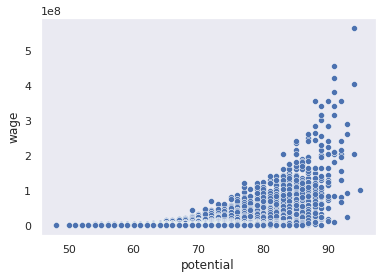

In [ ]:
sns.scatterplot(data=df_fifa, x='potential', y='wage')

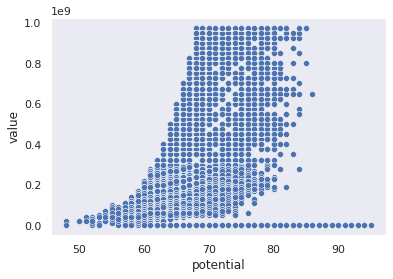

In [ ]:
sns.scatterplot(data=df_fifa, x='potential', y='value')

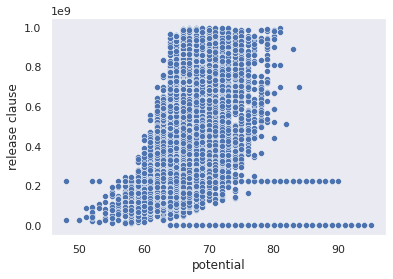

In [ ]:
sns.scatterplot(data=df_fifa, x='potential', y='release clause')

Há uma tendência de o salário, o valor e a cláusula rescisória aumentar exponencialmente com o aumento do potencial do atleta.

___
## 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?

In [68]:
df_fifa.groupby(by=['age', 'club', 'nationality']).agg({'overall': 'mean'}).sort_values(by='overall', ascending=False).head(10)

overall
age club                nationality         
33  Juventus            Portugal        94.0
31  FC Barcelona        Argentina       94.0
26  Paris Saint-Germain Brazil          92.0
31  FC Barcelona        Uruguay         91.0
27  Chelsea             Belgium         91.0
    Manchester City     Belgium         91.0
    Manchester United   Spain           91.0
32  Real Madrid         Croatia         91.0
                        Spain           91.0
    Manchester City     Spain           90.0

[10 rows x 1 columns]

Os jogadores com maior overall estão na faixa dos 30 anos e jogam nos principais clubes do mundo. Não há uma tendência clara em relação à nacionalidade.

In [71]:
# Jogadores com overall 94
df_fifa.loc[df_fifa['overall'] == 94, ['name', 'nationality', 'club', 'overall']].sort_values(by='name')

,name,nationality,club,overall
ID,,,,
20801,Cristiano Ronaldo,Portugal,Juventus,94
158023,L. Messi,Argentina,FC Barcelona,94


___
## 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

In [74]:
# Avaliando os principais clubes pela média geral de overall e potential dos seus jogadores
df_pot_over_club = df_fifa.groupby(by='club').agg({'overall': 'mean', 'potential': 'mean'})
df_pot_over_club.sort_values(by=['overall', 'potential'], ascending=False, inplace=True)
df_pot_over_club.head(10)

,overall,potential
club,,
Juventus,82.28,85.52
Napoli,80.00,83.44
Inter,79.75,81.75
Real Madrid,78.24,84.64
Milan,78.07,82.56
FC Barcelona,78.03,85.30
Paris Saint-Germain,77.43,83.57
Roma,77.42,82.19
Manchester United,77.24,82.67


Em um plantel há sempre vários jogadores que quase nunca jogam por não serem tão bons e isso baixa a média de overall e potential dos clubes. Ao enfrentá-los, o adversário em geral irá se deparar com os seus principais jogadores, portanto uma visão mais realista deveria selecionar os 16 melhores jogadores de cada clube, que em geral jogarão, para então avaliar quais são os melhores times. 

In [76]:
# Criando um dataframe com os 16 melhores jogadores em overall e potential (nessa ordem)
df_times = df_fifa.sort_values(by=['overall', 'potential'], ascending=False).groupby(by='club').head(16)
# Ordenando os clubes por overall e potential médio do time
df_times.groupby(by='club').agg({'overall': 'mean', 'potential': 'mean'}).sort_values(by=['overall', 'potential'], ascending=False).head(10)

,overall,potential
club,,
Real Madrid,86.69,88.56
FC Barcelona,86.12,89.06
Juventus,85.94,87.06
Manchester City,85.81,88.06
FC Bayern München,85.31,87.25
Paris Saint-Germain,84.50,86.81
Atlético Madrid,84.44,87.62
Tottenham Hotspur,83.81,85.62
Chelsea,83.62,85.56


___
## 19. Apresente o ranking dos goleiros (use a variável/atributo 'Position') por Potencial, Overall. Estamos à procura de 'GK'.

In [80]:
df_fifa.loc[df_fifa['position'] == 'GK', ['name', 'nationality', 'club', 'overall', 'potential']].sort_values(by=['overall', 'potential'], ascending=False).head(10)

,name,nationality,club,overall,potential
ID,,,,,
193080,De Gea,Spain,Manchester United,91,93
200389,J. Oblak,Slovenia,Atlético Madrid,90,93
192448,M. ter Stegen,Germany,FC Barcelona,89,92
192119,T. Courtois,Belgium,Real Madrid,89,90
167495,M. Neuer,Germany,FC Bayern München,89,89
167948,H. Lloris,France,Tottenham Hotspur,88,88
162835,S. Handanovič,Slovenia,Inter,88,88
1179,G. Buffon,Italy,Paris Saint-Germain,88,88
193041,K. Navas,Costa Rica,Real Madrid,87,87


___
## 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed')

In [82]:
df_fifa[['name', 'nationality', 'club', 'sprintspeed']].sort_values(by='sprintspeed', ascending=False).head(10)

,name,nationality,club,sprintspeed
ID,,,,
222492,L. Sané,Germany,Manchester City,96.0
231747,K. Mbappé,France,Paris Saint-Germain,96.0
213956,Adama,Spain,Wolverhampton Wanderers,96.0
173731,G. Bale,Wales,Real Madrid,95.0
206070,Maicon,Brazil,Livorno,95.0
188567,P. Aubameyang,Gabon,Arsenal,95.0
207444,J. Damm,Mexico,Tigres U.A.N.L.,95.0
216258,I. Bebou,Togo,Hannover 96,95.0
202882,T. Bifouma,Congo,MKE Ankaragücü,94.0


___
## 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

In [84]:
df_fifa[['name', 'nationality', 'club', 'shotpower']].sort_values(by='shotpower', ascending=False).head(5)

,name,nationality,club,shotpower
ID,,,,
20801,Cristiano Ronaldo,Portugal,Juventus,95.0
189362,Hulk,Brazil,Shanghai SIPG FC,94.0
169051,F. Guarín,Colombia,Shanghai Greenland Shenhua FC,93.0
150516,L. Podolski,Germany,Vissel Kobe,92.0
171919,Naldo,Brazil,FC Schalke 04,92.0


___
## 22. Quem são os outliers em termos de salário?

In [87]:
# Calcula os valores de salário que são considerados limites para fins de definição de outliers
q1, q3 = np.percentile(df_fifa['wage'], [25, 75])
out_min = q1 - 1.5 * (q3 - q1)
out_max = q1 + 1.5 * (q3 - q1)
print(f'Limite máximo para outlier: {out_max}')
print(f'Limite mínimo para outlier: {out_min}')

Limite máximo para outlier: 13000000.0
Limite mínimo para outlier: -11000000.0


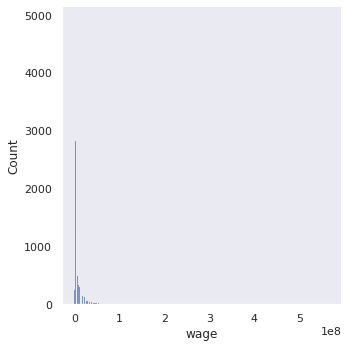

In [93]:
# Verificando a distribuição dos salários, já que é estranho que o limite inferior para salário seja negativo
sns.displot(data=df_fifa, x='wage')

A imensa maioria dos jogadores consta como sem salário (talvez por não terem um clube). Isso responde o fato de o limite inferior para outlier ser negativo.

In [94]:
# Verificando se não há salários negativos
df_fifa[['name', 'nationality', 'club', 'wage']].sort_values(by='wage').head(5)

,name,nationality,club,wage
ID,,,,
222402,J. Gulley,New Zealand,NaN,0.0
177149,B. Jokič,Slovenia,NaN,0.0
225882,D. Mendiseca,Paraguay,NaN,0.0
245979,A. Tsvetkov,Bulgaria,NaN,0.0
218971,S. Gbohouo,Ivory Coast,NaN,0.0


Como não temos nenhum jogador com salário negativo, não faz sentido procurar outliers inferiores. Vamos procurar os outliers superiores.

In [97]:
df_wage_out = df_fifa.loc[df_fifa['wage'] > out_max, ['name', 'nationality', 'club', 'wage']].sort_values(by='wage', ascending=False)
print(f'Total de jogadores com salários outliers: {df_wage_out.shape[0]}')
print('5 maiores salários:')
df_wage_out.head(5)

Total de jogadores com salários outliers: 3243
5 maiores salários:


,name,nationality,club,wage
ID,,,,
158023,L. Messi,Argentina,FC Barcelona,5.65e+08
176580,L. Suárez,Uruguay,FC Barcelona,4.55e+08
177003,L. Modrić,Croatia,Real Madrid,4.20e+08
20801,Cristiano Ronaldo,Portugal,Juventus,4.05e+08
155862,Sergio Ramos,Spain,Real Madrid,3.80e+08


___
## 23. Quem são os outliers em termos de potência no chute?

In [98]:
# Calcula os valores de salário que são considerados limites para fins de definição de outliers
q1, q3 = np.percentile(df_fifa['shotpower'], [25, 75])
out_min = q1 - 1.5 * (q3 - q1)
out_max = q1 + 1.5 * (q3 - q1)
print(f'Limite máximo para outlier: {out_max}')
print(f'Limite mínimo para outlier: {out_min}')

Limite máximo para outlier: 79.5
Limite mínimo para outlier: 10.5


In [100]:
# Verificando os outliers superiores de 'shotpower'
df_shot_out_max = df_fifa.loc[df_fifa['shotpower'] > out_max, ['name', 'nationality', 'club', 'shotpower']].sort_values(by='shotpower', ascending=False)
print(f'Total de jogadores outliers superiores em potência no chute: {df_shot_out_max.shape[0]}')
print('5 maiores potências no chute:')
df_shot_out_max.head(5)

Total de jogadores outliers superiores em potência no chute: 657
5 maiores potências no chute:


,name,nationality,club,shotpower
ID,,,,
20801,Cristiano Ronaldo,Portugal,Juventus,95.0
189362,Hulk,Brazil,Shanghai SIPG FC,94.0
169051,F. Guarín,Colombia,Shanghai Greenland Shenhua FC,93.0
150516,L. Podolski,Germany,Vissel Kobe,92.0
173731,G. Bale,Wales,Real Madrid,92.0


In [101]:
# Verificando os outliers inferiores de 'shotpower'
df_shot_out_min = df_fifa.loc[df_fifa['shotpower'] < out_min, ['name', 'nationality', 'club', 'shotpower']].sort_values(by='shotpower')
print(f'Total de jogadores outliers inferiores em potência no chute: {df_shot_out_min.shape[0]}')
print('5 menores potências no chute:')
df_shot_out_min.head(5)

Total de jogadores outliers inferiores em potência no chute: 15
5 menores potências no chute:


,name,nationality,club,shotpower
ID,,,,
204349,I. Šehić,Bosnia Herzegovina,BB Erzurumspor,2.0
201847,L. Bostyn,Belgium,SV Zulte-Waregem,3.0
181831,Yang Cheng,China PR,Hebei China Fortune FC,6.0
182470,Yu Ziqian,China PR,Dalian YiFang FC,6.0
182312,Yang Jun,China PR,Tianjin Quanjian FC,7.0


___
## 24. Qual a correlação e a interpretação entre as variáveis 'value' e as demais variáveis numéricas do dataframe?

Vamos fazer uma análise geral. Para analisar apenas a correlação com a variável 'value', podemos olhar apenas as coordenadas correspondentes a ela nos resultados.

In [103]:
# Construindo um dataframe apenas com variáveis numéricas
df_fifa_num = df_fifa.select_dtypes(include=['float64', 'int64']).drop(columns='qtd')
df_fifa_num.head()

,age,overall,potential,value,wage,special,international reputation,weak foot,skill moves,jersey number,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,31,94,94,110500.0,5.65e+08,2202,5.0,4.0,4.0,10.0,170.0,72.11,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
20801,33,94,94,77000.0,4.05e+08,2228,5.0,4.0,5.0,7.0,188.0,82.99,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
190871,26,92,93,118500.0,2.90e+08,2143,5.0,5.0,5.0,10.0,175.0,68.03,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
193080,27,91,93,72000.0,2.60e+08,1471,4.0,3.0,1.0,1.0,193.0,76.19,60.0,60.0,60.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,63.0,61.0,61.0,61.0,63.0,60.0,60.0,60.0,60.0,60.0,60.0,59.0,59.0,59.0,60.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
192985,27,91,92,102000.0,3.55e+08,2281,4.0,5.0,4.0,7.0,180.0,69.84,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [115]:
# Montando uma matriz de correlação entre as variáveis numéricas
df_fifa_corr = df_fifa_num.corr()
matriz_correlacao = df_fifa_corr.where(np.triu(np.ones(df_fifa_corr.shape), k = 1).astype(np.bool))
matriz_correlacao

,age,overall,potential,value,wage,special,international reputation,weak foot,skill moves,jersey number,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
age,NaN,0.45,-0.25,-0.05,0.14,0.24,0.25,0.06,0.03,-0.24,8.29e-02,2.30e-01,0.26,0.26,0.26,0.19,0.22,0.22,0.22,0.19,0.22,0.22,0.22,0.21,0.33,0.33,0.33,0.21,0.30,0.35,0.35,0.35,0.30,0.29,0.31,0.31,0.31,0.29,0.13,0.07,0.15,0.13,0.14,0.01,0.14,0.19,0.18,0.08,-1.58e-01,-1.52e-01,-0.02,0.45,-0.09,0.16,0.18,0.10,0.33,0.15,0.26,0.20,0.08,0.19,0.14,0.39,0.14,0.12,0.10,0.10,0.11,0.10,0.12,0.10,-0.03
overall,NaN,NaN,0.66,-0.24,0.57,0.61,0.50,0.21,0.41,-0.22,3.92e-02,1.55e-01,0.62,0.62,0.62,0.57,0.59,0.59,0.59,0.57,0.61,0.61,0.61,0.61,0.71,0.71,0.71,0.61,0.59,0.57,0.57,0.57,0.59,0.53,0.43,0.43,0.43,0.53,0.39,0.33,0.34,0.50,0.39,0.37,0.42,0.40,0.48,0.46,1.97e-01,2.10e-01,0.26,0.85,0.10,0.44,0.26,0.37,0.35,0.42,0.39,0.32,0.36,0.50,0.34,0.73,0.29,0.25,0.22,-0.03,-0.02,-0.03,-0.02,-0.02,-0.40
potential,NaN,NaN,NaN,-0.24,0.49,0.38,0.37,0.16,0.35,-0.01,-9.24e-03,-6.81e-03,0.40,0.40,0.40,0.41,0.42,0.42,0.42,0.41,0.43,0.43,0.43,0.43,0.46,0.46,0.46,0.43,0.34,0.31,0.31,0.31,0.34,0.30,0.20,0.20,0.20,0.30,0.25,0.24,0.20,0.37,0.25,0.31,0.28,0.23,0.32,0.35,2.34e-01,2.36e-01,0.22,0.51,0.14,0.29,0.11,0.20,0.08,0.27,0.17,0.15,0.24,0.35,0.22,0.44,0.16,0.14,0.13,-0.05,-0.05,-0.06,-0.05,-0.05,-0.40
value,NaN,NaN,NaN,NaN,-0.26,-0.12,-0.22,-0.05,-0.12,0.02,-6.57e-03,-1.92e-02,-0.20,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,-0.19,-0.20,-0.20,-0.20,-0.19,-0.22,-0.22,-0.22,-0.19,-0.15,-0.15,-0.15,-0.15,-0.15,-0.13,-0.10,-0.10,-0.10,-0.13,-0.07,-0.08,-0.04,-0.09,-0.09,-0.07,-0.10,-0.09,-0.10,-0.08,-8.76e-03,-5.00e-03,-0.03,-0.23,-0.01,-0.10,-0.02,-0.02,-0.01,-0.09,-0.06,-0.04,-0.07,-0.14,-0.08,-0.18,-0.03,-0.02,-0.01,-0.04,-0.04,-0.04,-0.04,-0.03,0.28
wage,NaN,NaN,NaN,NaN,NaN,0.35,0.67,0.14,0.26,-0.09,2.00e-02,6.48e-02,0.40,0.40,0.40,0.37,0.39,0.39,0.39,0.37,0.39,0.39,0.39,0.39,0.44,0.44,0.44,0.39,0.34,0.32,0.32,0.32,0.34,0.29,0.22,0.22,0.22,0.29,0.23,0.22,0.19,0.30,0.26,0.24,0.26,0.24,0.28,0.28,1.25e-01,1.30e-01,0.16,0.50,0.09,0.26,0.13,0.18,0.14,0.25,0.19,0.16,0.23,0.32,0.22,0.42,0.15,0.13,0.11,-0.03,-0.02,-0.03,-0.03,-0.03,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gkhandling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97,0.97,0.97,0.03
gkkicking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,0.97,0.03
gkpositioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97,0.02
gkreflexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [143]:
# Identificando as variáveis altamente correlacionadas
vars_alt_corr = pd.DataFrame(columns=['coluna', 'linha', 'corr'])
for i in range(len(matriz_correlacao.columns)):
    for j in range(i):
        if abs(matriz_correlacao.iloc[j, i]) > 0.8:
            dados = {'coluna': matriz_correlacao.columns[i],
                     'linha': matriz_correlacao.index[j],
                     'corr': matriz_correlacao.iloc[j, i]}
            vars_alt_corr = vars_alt_corr.append(dados, ignore_index=True)
vars_alt_corr

,coluna,linha,corr
0,st,ls,1.00
1,rs,ls,1.00
2,rs,st,1.00
3,lw,ls,0.93
4,lw,st,0.93
...,...,...,...
219,gkpositioning,gkkicking,0.96
220,gkreflexes,gkdiving,0.97
221,gkreflexes,gkhandling,0.97
222,gkreflexes,gkkicking,0.97


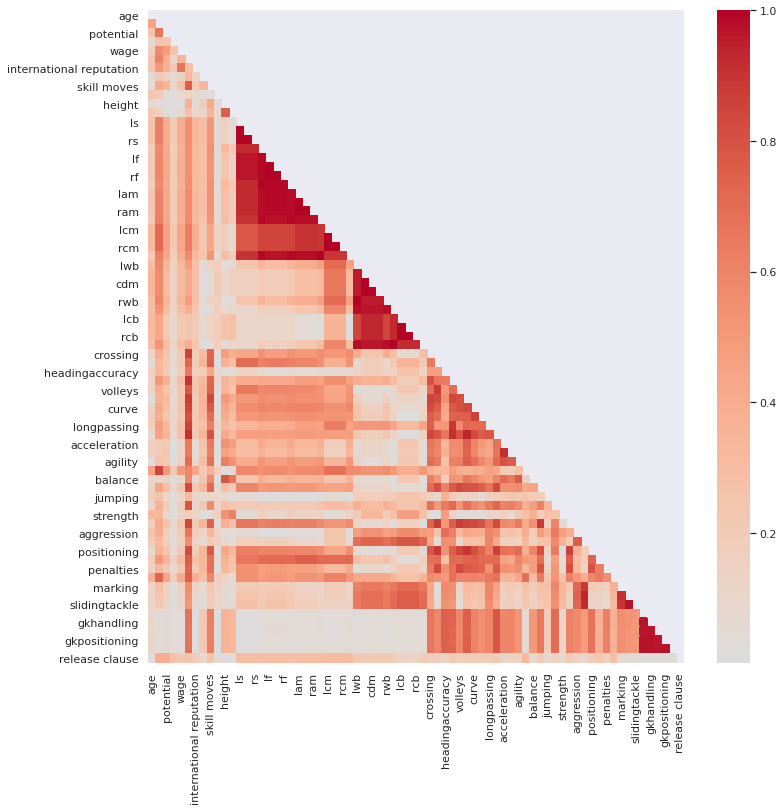

In [116]:
# Visualizando a matriz de correlação em um mapa de calor
fig, ax = plt.subplots(figsize = (12, 12)) 
mask = np.zeros_like(df_fifa_corr.abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_fifa_corr.abs(), mask= mask, ax= ax, cmap='coolwarm', annot= False, fmt= '.2f', center= 0)

___
## 25. Construa variáveis dummy para as colunas preferred_foot e work_rate. preferred_foot_left;